In [127]:
import numpy as np
import matplotlib.pyplot as plt

def valid_node(node, grid_size):
    """
    True if node is within grid 
    """
    if node[0] < 0 or node[0] >= grid_size:
        return False
    if node[1] < 0 or node[1] >= grid_size:
        return False
    return True

def up(node):
    return (node[0]-1,node[1])

def down(node):
    return (node[0]+1,node[1])

def left(node):
    return (node[0],node[1]-1)

def right(node):
    return (node[0],node[1]+1)

def backtrack(initial_node, target_node, distances):
    """
    From last node, bactrack to start node with the least steps
    """
    # last node
    path = [target_node]

    grid_size = distances.shape[0]

    # Choose the direction with smallest distance
    while True:
        
        l_distances, l_nodes = [],[]
        directions = [up,down,left,right]

        for direction in directions:
            node = direction(path[-1])
            
            if valid_node(node, grid_size):
                l_nodes.append(node)
                l_distances.append(distances[node[0],node[1]])

        least_distance_idx = np.argmin(l_distances)
        path.append(l_nodes[least_distance_idx])

        # Backtrack finish condition
        if path[-1][0] == path[-1][1] == initial_node[1]:
            break

    return list(reversed(path))

def dijkstra(initial_node, target_node, obstacles):
    """
    Dijkstras algorithm to find the shortest path between two nodes in a grid
    initial_node (list): [row,col] coordinates of the initial node
    target_node (list): [row,col] coordinates of the target node
    obstacles (array 2d): 2d numpy array that contains any obstacles as 1 and free space as 0
    Returns:list[list]: list of list of nodes that form the shortest path
    """
    
    # initialize cost heuristic map 
    # obstacles -> very high cost
    # normal tiles -> 1 cost (not 0 for backtrkck would not be possible)
    obstacles = obstacles.copy()
    
    obstacles *= 1000
    obstacles += np.ones(obstacles.shape)
    
    # make sure source and destination are free
    obstacles[initial_node[0],initial_node[1]] = 0
    obstacles[target_node[0],target_node[1]] = 0

    # initialize maps
    size_of_floor = obstacles.shape[0]

    # to store already visited nodes
    visited = np.zeros([size_of_floor,size_of_floor],bool)

    # initiate matrix to keep track of distance to source node
    # initial distance to nodes is infinity so we always get a lower actual distance
    distances = np.ones([size_of_floor,size_of_floor]) * np.inf
    
    # initial node has a distance of 0 to itself
    distances[initial_node[0],initial_node[1]] = 0

    # start algorithm
    current_node = [initial_node[0], initial_node[1]]
    
    while True:
        directions = [up, down, left, right]
        
        for direction in directions:
            select_nodes = direction(current_node)
            
            # boundary checking
            if valid_node(select_nodes, size_of_floor): 
                
                # check if we have visited this node before
                if not visited[select_nodes[0],select_nodes[1]]: 
                    
                    # update distance to node
                    distance = distances[current_node[0], current_node[1]] + obstacles[select_nodes[0],select_nodes[1]]

                    # update distance list if shortest
                    if distance < distances[select_nodes[0],select_nodes[1]]:
                        distances[select_nodes[0],select_nodes[1]] = distance


        # mark current node as visited
        visited[current_node[0]  ,current_node[1]] = True

        # select next node by choosing the shortest path so far
        all_dist = distances.copy()
        
        # select only not visited nodes
        all_dist[np.where(visited)] = np.inf
        
        # choose the shortest path
        node_index = np.argmin(all_dist)

        # convert index to row,col.
        node_row = node_index//size_of_floor
        node_col = node_index%size_of_floor
        
        # update current node.
        current_node = (node_row, node_col)

        # stop if we have reached the target node
        if current_node[0] == target_node[0] and current_node[1] == target_node[1]:
            break

    # backtrack to construct path
    return backtrack(initial_node,target_node,distances)

def gen_grid(size, pct_obstacles):
    """
    Generate square grid of shape size*size with a percentage of
    obstacles (0: free tile, 1: obstacle)
    """
    # round number of obstacles
    n1 = int((pct_obstacles/100)*size**2)
    
    # remains are 0
    n0 = size**2-n1

    # array of 0 and 1
    obstacles = np.array([1]*n1 + [0]*n0)
    
    # shuffle array
    np.random.shuffle(obstacles)
    
    # reshape to square grid
    obstacles = obstacles.reshape(size,size)

    # Force start/end nodes to 0
    obstacles[0][0] = 0
    obstacles[-1][-1] = 0

    # Convert obstacles to floats (necessary for Dijkstras algo)
    obstacles = np.vstack(obstacles[:, :]).astype(float)
    
    return obstacles

Clear path discovered.
[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (14, 4), (15, 4), (16, 4), (16, 5), (17, 5), (18, 5), (18, 6), (19, 6), (20, 6), (20, 7), (20, 8), (20, 9), (20, 10), (20, 11), (21, 11), (21, 12), (21, 13), (21, 14), (21, 15), (22, 15), (23, 15), (24, 15), (25, 15), (26, 15), (27, 15), (27, 16), (28, 16), (29, 16), (30, 16), (31, 16), (32, 16), (33, 16), (34, 16), (35, 16), (35, 17), (36, 17), (36, 18), (37, 18), (37, 19), (38, 19), (38, 20), (38, 21), (38, 22), (38, 23), (38, 24), (38, 25), (38, 26), (38, 27), (38, 28), (38, 29), (38, 30), (38, 31), (38, 32), (38, 33), (38, 34), (39, 34), (39, 35), (39, 36), (39, 37), (39, 38), (40, 38), (41, 38), (41, 39), (41, 40), (42, 40), (42, 41), (42, 42), (42, 43), (42, 44), (42, 45), (43, 45), (44, 45), (44, 46), (44, 47), (45, 47), (46, 47), (47, 47), (47, 48), (48, 48), (49, 48), [49, 49]]


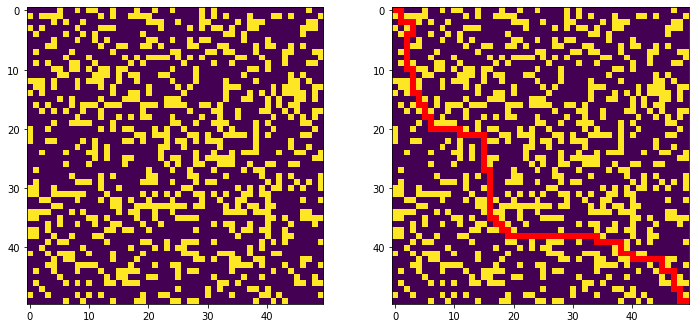

In [152]:
### Random simulation

# Problem parameters
seed = np.random.seed(42)  
size = 50
pct_obstacles = 30

# Grid generation
obstacles = gen_grid(size, pct_obstacles)

# Shotest path calculation
path = dijkstra([0,0],[size-1,size-1],obstacles)

# Check number of obstacles hit if any
hit_sum = np.array([obstacles[x[0]][x[1]] for x in path]).sum()

if hit_sum > 0:
    print('No clear path found: %i obstacle(s) hit.'%hit_sum)
else:
    print('Clear path discovered.')
    
# Display path
print(path)

# Display path
p = np.zeros(shape=obstacles.shape)
for i in range(len(path)):
    p[path[i][0],path[i][1]] = np.nan

cmap = plt.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')
    
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(obstacles, cmap=cmap)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(p+obstacles, cmap=cmap)